In [104]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame()

# base_dir = 'result_csv_ner'
# base_dir = 'result_csv_classify'
base_dir = 'results/result_csv_classify_bert_base'
# base_dir = 'results/result_csv_classify_bert_large'
# base_dir = 'results/result_csv_ner_bert_base'
# base_dir = 'results/result_csv_ner_bert_large'

model_name = "BERT-uncased-base (cls)"
# model_name = "BERT-uncased-large (cls)"
# model_name = "Twitter-based RoBERTa"
# model_name = "Medical-NER"

for file_path in glob(f'../{base_dir}/*.csv'):
    df = pd.concat([df, pd.read_csv(file_path)], ignore_index=True)

df.head()

,dataset,iteration,type,gpt_model,drugs_context,symptom_context,eval_loss,eval_precision,eval_recall,eval_f1,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,tweet_w_drug_w_symptom_s,0,span,No,True,True,0.130928,0.612245,0.461538,0.526316,0.944041,2.5986,371.352,6.157,30.0
1,tweet_w_drug_w_symptom_s,1,span,No,True,True,0.145627,0.613636,0.415385,0.495413,0.943005,2.1783,443.010,7.345,30.0
2,tweet_w_drug_w_symptom_s,2,span,No,True,True,0.136152,0.674419,0.446154,0.537037,0.948187,2.5988,371.327,6.157,30.0
3,tweet_w_drug_w_symptom_s,4,span,No,True,True,0.135036,0.710526,0.415385,0.524272,0.949223,2.6065,370.225,6.138,30.0
4,tweet_w_drug_w_symptom_s,5,span,No,True,True,0.134176,0.659091,0.446154,0.532110,0.947150,2.6072,370.132,6.137,30.0


In [105]:
df['type'] = df['type'].fillna('baseline')

df['type'].unique()

array(['span', 'context', 'span/context', 'baseline'], dtype=object)

In [106]:
df['dataset'].unique()

array(['tweet_w_drug_w_symptom_s', 'tweet_w_symptom_c', '4o_mini_sc',
       'tweet_w_symptom_s', '4o_sc', '4o_w_drug_w_symptom_s', '35_s',
       '4o_w_drug_s', '4o_c', '4o_w_symptom_c',
       'tweet_w_drug_w_symptom_c', '4o_w_drug_w_symptom_c', '35_c',
       'tweet_w_drug_c', '4o_s', '4o_w_symptom_s', 'tweet_w_drug_s',
       'tweet', '4o_mini_c', '4o_mini_s', '4o_w_drug_c', '35_sc'],
      dtype=object)

In [107]:
dataset_order = ['tweet', 'tweet_w_symptom_c', 'tweet_w_drug_c', 'tweet_w_drug_w_symptom_c', 'tweet_w_symptom_s', 'tweet_w_drug_s', 'tweet_w_drug_w_symptom_s',
                 '4o_c', '4o_w_drug_c', '4o_w_symptom_c', '4o_w_drug_w_symptom_c',
                 '4o_s', '4o_w_drug_s', '4o_w_symptom_s', '4o_w_drug_w_symptom_s',
                 '4o_sc', 
                 '35_c', '35_s', '35_sc',
                 '4o_mini_c', '4o_mini_s', '4o_mini_sc']

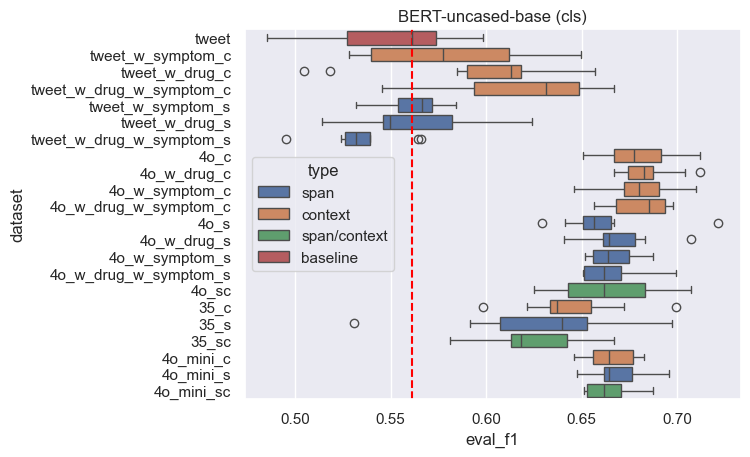

In [108]:
value_name = 'eval_f1'
threshold_value = df[df['type'] == 'baseline'][value_name].median()

sns.set()

df_filtered = df.copy()

dataset_order_filtered = [a for a in dataset_order if a in df_filtered['dataset'].unique()]

dataset_mapping = {name: idx + 1 for idx, name in enumerate(dataset_order_filtered)}
df_filtered["dataset_number"] = df_filtered["dataset"].map(dataset_mapping)

# g = sns.FacetGrid(tips, col="gpt_model", row="sex")
# g.map_dataframe(sns.boxplot, x="dataset", binwidth=2, binrange=(0, 60))

ax = sns.boxplot(data=df_filtered, y='dataset', x=value_name, hue='type', order=dataset_order_filtered)
ax.axvline(x=threshold_value, ls='--', c='red')
# ax.tick_params(axis='x', rotation=90)

ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.set_title(model_name)


fig = ax.get_figure()
fig.savefig(f"../{base_dir}/{model_name.lower().replace('-', '_')}{value_name}.png", bbox_inches="tight")

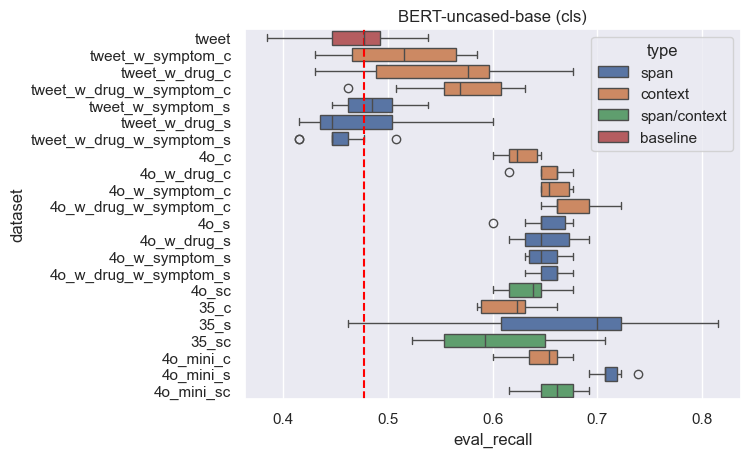

In [109]:
value_name = 'eval_recall'
threshold_value = df[df['type'] == 'baseline'][value_name].median()

sns.set()

# df_filtered = df[df['type'].isin(['baseline', 'context'])]
df_filtered = df

dataset_order_filtered = [a for a in dataset_order if a in df_filtered['dataset'].unique()]

ax = sns.boxplot(data=df_filtered, y='dataset', x=value_name, hue='type', order=dataset_order_filtered)
ax.axvline(x=threshold_value, ls='--', c='red')
# ax.tick_params(axis='x', rotation=90)

ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.set_title(model_name)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig = ax.get_figure()
fig.savefig(f"../{base_dir}/{model_name.lower().replace('-', '_')}{value_name}.png", bbox_inches="tight")

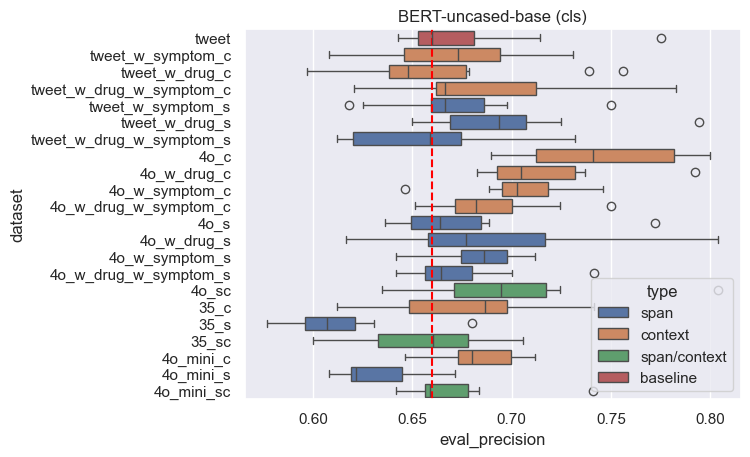

In [110]:
value_name = 'eval_precision'
threshold_value = df[df['type'] == 'baseline'][value_name].median()

sns.set()

# df_filtered = df[df['type'].isin(['baseline', 'context'])]
df_filtered = df

dataset_order_filtered = [a for a in dataset_order if a in df_filtered['dataset'].unique()]

ax = sns.boxplot(data=df_filtered, y='dataset', x=value_name, hue='type', order=dataset_order_filtered)
ax.axvline(x=threshold_value, ls='--', c='red')
# ax.tick_params(axis='x', rotation=90)

ax.yaxis.grid(False)
ax.xaxis.grid(True)
ax.set_title(model_name)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

fig = ax.get_figure()
fig.savefig(f"../{base_dir}/{model_name.lower().replace('-', '_')}{value_name}.png", bbox_inches="tight")